<h1 align="center">Daft.ie DATA WRANGLING</h1>

<div align="center">
    In this notebook we will work with the data of the of houses publisheds in the month of Dec 2021 & Jan 2022 in the website <a href="https://www.daft.ie/">Daft.ie</a>.
    <br>
    The data used was extracted from <a href="https://www.kaggle.com/datasets/eavannan/daftie-house-price-data">this Kaggle dataset</a>.
</div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read CSV file without setting any column as the index
df = pd.read_csv("daft_data_01_2022.csv", index_col=False)

## Dataset Variables for Your Reference

The dataset includes the following variables:

- **ID**: A unique identifier for each property listing.
- **Title**: The title or headline of the property listing.
- **FeaturedLevel**: The level of prominence given to the listing on the platform (e.g., featured or standard).
- **PublishDate**: The date when the property listing was published.
- **Price**: The listed price of the property in Euros.
- **NumBedrooms**: The number of bedrooms in the property.
- **NumBathrooms**: The number of bathrooms in the property.
- **PropertyType**: The type of property, such as house, apartment, duplex, etc.
- **PropertySize**: The total size of the property in square meters.
- **Category**: The category of the property, which can include types like residential, commercial, etc.
- **AMV_Price**: The auction market value price of the property.
- **SellerId**: A unique identifier for the seller of the property.
- **Seller_Name**: The name of the individual or agency selling the property.
- **Seller_Branch**: The specific branch or location of the seller.
- **SellerType**: The type of seller listing the property (e.g., individual or agency).
- **M_TotalImages**: The number of images available for the property listing.
- **M_HasVideo**: A boolean value indicating whether the listing has a video tour.
- **M_HasVirtualTour**: A boolean value indicating whether the listing has a virtual tour.
- **M_HasBrochure**: A boolean value indicating whether the listing includes a brochure.
- **BER_Rating**: The Building Energy Rating (BER) of the property, indicating energy efficiency (A1, B2, etc.).
- **Longitude**: The geographical longitude coordinate of the property.
- **Latitude**: The geographical latitude coordinate of the property.


In [3]:
df.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601


In [4]:
# Checking df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


<p style="text-align: center;">
    In the data vizualisation part, this latitude and longitude is set to a house in USA.
    <br>
    Replace the coordinates of the house to its real address is in cork.
</p>

In [5]:
#finding row
filtered_longitude_df = df[df['longitude'] == -100.445882]
filtered_longitude_df

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
3902,3645859,"6 Ashgrove Drive, Ballyvolane, Ballyvolane, Co...",standard,2022-01-24,295000,3,1,Detached,84.0,Buy,...,John O'Connell,GVM Auctioneers - Limerick,BRANDED_AGENT,4.0,False,False,False,XXX,-100.445882,39.78373


In [6]:
most_expensive = df[df['price'] == 4500000]
most_expensive

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
1372,3687075,"Hermitage Westminster Road Foxrock Dublin 18, ...",standard,2022-01-29,4500000,5,6,Detached,450.0,Buy,...,Gerry Rowland,Gerry Rowland Auctioneer,UNBRANDED_AGENT,21.0,False,False,False,F,-9.368617,54.161705


In [7]:
# Replace latitude and longitude using id
df.loc[df['id'] == 3645859, ['latitude', 'longitude']] = [51.9044, -8.4446]

In [8]:
# check if worked
df[df['id'] == 3645859]

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
3902,3645859,"6 Ashgrove Drive, Ballyvolane, Ballyvolane, Co...",standard,2022-01-24,295000,3,1,Detached,84.0,Buy,...,John O'Connell,GVM Auctioneers - Limerick,BRANDED_AGENT,4.0,False,False,False,XXX,-8.4446,51.9044


<p style="text-align: center;">
    Checking rows under 30sqm.
</p>


In [9]:
# rows where propertySize is < than 30
df_filtered = df[df['propertySize'] < 30]

# Show columns to analyze data for these rows
df_filtered[['propertySize', 'price', 'title']].sort_values(by='propertySize')

,propertySize,price,title
1457,1.0,185000,"Ballymore Lodge Ballycanew, Gorey, Co. Wexford"
1640,1.0,220000,"NICHOLSON'S, Bridge Street, Ballyhaunis, Co. Mayo"
2378,1.0,80000,"Knockeennahone, Scartaglin, Co. Kerry"
1652,7.0,149000,"37 Bruach Na Gaile, Moyvane, Co. Kerry"
1836,7.0,185000,"Apartment 102, The Harbour Mill, Westport, Co...."
983,11.0,276500,"31 The Close, Clonattin Village, Gorey, Co. We..."


<p style="text-align: center;">
    Checking rows over 1000sqm.
</p>


In [10]:
# rows where propertySize is > than 1000
df_filtered = df[df['propertySize'] > 1000]

# Show columns to analyze data for these rows
df_filtered[['title', 'propertySize', 'numBedrooms','numBathrooms']].sort_values(by='propertySize')


,title,propertySize,numBedrooms,numBathrooms
2071,"34 Church View, Claregalway, Co. Galway",1200.0,3,2
2270,"1 College View Green, Castlebar, Co. Mayo",1200.0,3,2
3070,"Firmount House, Millicent Road, Clane, Co. Kil...",1208.0,14,9
383,"45 The Green, Coolroe Meadows, Ballincollig, C...",1300.0,4,3
3548,"Joristown, Killucan, Co. Westmeath",1350.0,5,1
3789,"Lunniagh, Derrybeg, Co. Donegal",1350.0,3,2
2238,"13 Lios Na Sé­, Johnstown, Co. Kilkenny",1570.0,4,2
1429,"40 Heather Grove, Clara, Co. Offaly",2855.0,3,3
1614,"Bridge St., Ballyhaunis, Co. Mayo",2855.0,5,2
3442,"13 Donomore Crescent, Tallaght, Dublin 24",8094.0,3,1


In [11]:
df.shape

(3967, 22)

<p style="text-align: center;">
    Using a subset ('title', 'propertySize', 'numBedrooms','numBathrooms') to drop duplicates in the DataFrame
</p>


In [12]:
df = df.drop_duplicates(subset=['title', 'propertySize', 'numBedrooms','numBathrooms'])

In [13]:
df.shape

(3952, 22)

In [14]:
# Counting null values
null_counts = df.isna().sum()
print(null_counts)

id                    0
title                 0
featuredLevel         0
publishDate           0
price                 0
numBedrooms           0
numBathrooms          0
propertyType          0
propertySize        348
category              0
AMV_price             0
sellerId              0
seller_name           0
seller_branch         0
sellerType            0
m_totalImages         0
m_hasVideo            0
m_hasVirtualTour      0
m_hasBrochure         0
ber_rating            0
longitude             0
latitude              0
dtype: int64


In [15]:
#Use the unique function to check for misspelling
print(df["m_hasVideo"].unique())
print(df["m_hasVirtualTour"].unique())
print(df["m_hasBrochure"].unique())
print(df["sellerType"].unique())

[False  True]
[False  True]
[False  True]
['BRANDED_AGENT' 'UNBRANDED_AGENT' 'PRIVATE_USER']


<p style="text-align: center;">
    The values of the three columns, <i>m_hasVideo</i>, <i>m_hasVirtualTour</i>, and <i>m_hasBrochure</i>, are booleans. 
    We will convert them to 0 for <b>False</b> and 1 for <b>True</b>.
</p>
<p style="text-align: center;">
    Additionally, we will rename these columns to facilitate visualization.
</p>


In [16]:
# Convert from bool to int, the value will change as bool can only be 0 or 1
df["m_hasVideo"] = df["m_hasVideo"].astype(int)
df["m_hasVirtualTour"] = df["m_hasVirtualTour"].astype(int)
df["m_hasBrochure"] = df["m_hasBrochure"].astype(int)

In [17]:
# Renaming columns
df.rename(columns= {"m_totalImages": "total_images", "m_hasVideo": "video", "m_hasVirtualTour": "virtual_tour", "m_hasBrochure": "brochure"}, inplace = True)

In [18]:
df.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,0,0,0,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,0,0,0,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,0,1,0,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,0,0,0,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,0,0,0,G,-6.879797,53.728601


Reorganasing id/index column

In [19]:
#Drop the 'id' column
df.drop(columns='id', inplace=True)

# Reset index and make it the new 'id' column
df.reset_index(drop=True, inplace=True)
# https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv

# Rename the index column to 'id'
df.rename(columns={'index': 'id'}, inplace=True)

In [20]:
df.tail()

,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,AMV_price,...,seller_name,seller_branch,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
3947,"13 Cherry Close, Bellfield, Waterford",standard,2022-01-24,235000,3,3,Semi-D,103.0,Buy,0,...,Robert Forbes,Forbes Property,BRANDED_AGENT,24.0,0,1,0,A1,-7.212145,53.647194
3948,"8 Thomas Street, Castlebar, Co. Mayo",standard,2022-01-30,149500,3,1,Bungalow,82.0,Buy,0,...,DNG John O' Brien Office,DNG John O’Brien,UNBRANDED_AGENT,14.0,1,0,0,A3,-6.753848,54.115088
3949,"69 McAuley Drive, Artane, Artane, Dublin 5",standard,2022-01-28,375000,3,1,Terrace,NaN,Buy,0,...,Jackie Horan,Sherry FitzGerald New Homes,BRANDED_AGENT,25.0,0,0,0,A2,-6.086274,53.146090
3950,"School Land, Ballinalee, Co. Longford",standard,2021-12-04,170000,4,2,Detached,128.0,Buy,0,...,Tom Hickey,Hickey O'Donoghue Auctioneers Ltd.,BRANDED_AGENT,38.0,0,1,0,A2,-8.652927,52.664558
3951,"14 Coolmagort Ave, Beaufort, Killarney, Co. Kerry",standard,2022-01-30,250000,3,2,Bungalow,116.0,Buy,0,...,Coonan Naas,Coonan Estate Agents Ltd,UNBRANDED_AGENT,69.0,0,1,0,A3,-6.792938,53.166008


In [21]:
# Get unique values and sort them
unique_dates_ordered = df['publishDate'].sort_values().unique()
# check order
unique_dates_ordered

array(['2021-12-01', '2021-12-04', '2021-12-06', '2021-12-07',
       '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
       '2021-12-17', '2021-12-18', '2021-12-20', '2021-12-21',
       '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
       '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
       '2022-01-01', '2022-01-03', '2022-01-04', '2022-01-05',
       '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
       '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
       '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17',
       '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
       '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
       '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
       '2022-01-30'], dtype=object)

In [22]:
# get first and last date
start_date = pd.to_datetime(unique_dates_ordered[0])
end_date = pd.to_datetime(unique_dates_ordered[-1])

# Calculate difference of the two dates
days_difference = (end_date - start_date).days

# get days difference
days_difference

60

<p style="text-align: center;">As there are only 60 days we will delete published date as it doesn't affect the flutuation of the rent at that time</p>

In [23]:
# AMV or advised minimum value has only 0 and 1, so we can drop this column as it wont add anything to our analysis
df["AMV_price"].unique()


array([0, 1], dtype=int64)

<p style="text-align: center;">
    We will also delete "sellerId", "seller_name", "seller_branch", and "title" as these values do not contribute to the property price.
</p>
<p style="text-align: center;">
    Although the "title" (location) could be relevant, we already have longitude and latitude data and can use geospatial data instead as we progress.
</p>


In [24]:
# dropping columns that wont be of much use for EDA
df = df.drop(["title", "publishDate", "AMV_price", "sellerId", "seller_name", "seller_branch"], axis =1)

In [25]:
# ber_rationg has an inherent structure (like energy ratings where A1 > A2 > B1, etc.)
# it’s better to use ordinal encoding (saves memory)
ber_rating_mapping = {
    'A1': 1,
    'A1A2': 2,
    'A2': 3,
    'A3': 4,
    'B1': 5,
    'B2': 6,
    'B3': 7,
    'C1': 8,
    'C2': 9,
    'C3': 10,
    'D1': 11,
    'D2': 12,
    'E1': 13,
    'E2': 14,
    'F': 15,
    'G': 16,
    'SI_666': 17,
    'XXX': 18
}

# Apply the mapping to the 'ber_rating' column
df['ber_rating_numeric'] = df['ber_rating'].map(ber_rating_mapping)

In [26]:
# drop original ber_rating with object value
df = df.drop(columns=['ber_rating'])

# rename ber_rating_numeric to ber_rating
df = df.rename(columns={'ber_rating_numeric': 'ber_rating'})

In [27]:
# Check unique values in 'ber_rating' column
print(df['ber_rating'].unique())


[ 9  8  4 16 12  7 11 10 13 17 15 14  6 18  3  5  1  2]


### Ordinal Encoding Mapping:
The `ber_rating` values are mapped to numeric values as follows:

<table style="text-align: left; margin-left: 0;">
    <thead>
        <tr>
            <th>BER Rating</th>
            <th>Numeric Value</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>A1</td><td>1</td></tr>
        <tr><td>A1A2</td><td>2</td></tr>
        <tr><td>A2</td><td>3</td></tr>
        <tr><td>A3</td><td>4</td></tr>
        <tr><td>B1</td><td>5</td></tr>
        <tr><td>B2</td><td>6</td></tr>
        <tr><td>B3</td><td>7</td></tr>
        <tr><td>C1</td><td>8</td></tr>
        <tr><td>C2</td><td>9</td></tr>
        <tr><td>C3</td><td>10</td></tr>
        <tr><td>D1</td><td>11</td></tr>
        <tr><td>D2</td><td>12</td></tr>
        <tr><td>E1</td><td>13</td></tr>
        <tr><td>E2</td><td>14</td></tr>
        <tr><td>F</td><td>15</td></tr>
        <tr><td>G</td><td>16</td></tr>
        <tr><td>SI_666</td><td>17</td></tr>
        <tr><td>XXX</td><td>18</td></tr>
    </tbody>
</table>


In [28]:
df.head()

,featuredLevel,price,numBedrooms,numBathrooms,propertyType,propertySize,category,sellerType,total_images,video,virtual_tour,brochure,longitude,latitude,ber_rating
0,featured,290000,3,3,End of Terrace,96.0,Buy,BRANDED_AGENT,16.0,0,0,0,-8.382500,51.822940,9
1,featured,225000,3,2,Semi-D,93.0,Buy,BRANDED_AGENT,33.0,0,0,0,-7.177098,53.157465,8
2,featured,575000,4,3,Semi-D,162.0,Buy,BRANDED_AGENT,38.0,0,1,0,-6.342763,53.269493,4
3,featured,299000,3,3,Semi-D,NaN,Buy,BRANDED_AGENT,22.0,0,0,0,-8.640716,52.629588,9
4,featured,120000,3,1,Terrace,68.0,Buy,BRANDED_AGENT,5.0,0,0,0,-6.879797,53.728601,16


___

---

<h1 align="center"> START ONE HOT ENCODING </h1>

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

<h5 align="center">Data on property size has 355 NaN values. To fill those missing values, we will apply the multiple imputation method.</h5>

<p style="text-align: center;">
    The multiple imputation method is a multivariate imputation technique, meaning that the missing information is filled by taking into consideration the information from the other columns.
    <a href="https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values?dc_referrer=https%3A%2F%2Fwww.google.com%2F">Data Camp</a>
</p>

<p style="text-align: center;">Before the multiple imputation, we will convert the categorical data through one-hot encoding.</p>


In [30]:
df.info()
#featuredLevel, propertyType, category, sellerType, ber_rating, are still set as object values, so we will one hot encode those values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   featuredLevel  3952 non-null   object 
 1   price          3952 non-null   int64  
 2   numBedrooms    3952 non-null   int64  
 3   numBathrooms   3952 non-null   int64  
 4   propertyType   3952 non-null   object 
 5   propertySize   3604 non-null   float64
 6   category       3952 non-null   object 
 7   sellerType     3952 non-null   object 
 8   total_images   3952 non-null   float64
 9   video          3952 non-null   int32  
 10  virtual_tour   3952 non-null   int32  
 11  brochure       3952 non-null   int32  
 12  longitude      3952 non-null   float64
 13  latitude       3952 non-null   float64
 14  ber_rating     3952 non-null   int64  
dtypes: float64(4), int32(3), int64(4), object(4)
memory usage: 416.9+ KB


In [31]:
# define a function to print unique values
def unique_values(columns):
    for column in columns:
        print(f"{column} unique values:")
        print(df[column].unique())
        print("-------------------------------------------------------")
        print("")

# List of columns
columns = ["featuredLevel", "propertyType", "category", "sellerType"]

# print unique values for columns
unique_values(columns)


featuredLevel unique values:
['featured' 'premium' 'standard']
-------------------------------------------------------

propertyType unique values:
['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow'
 'Townhouse' 'Duplex' 'Site' 'Studio' 'House']
-------------------------------------------------------

category unique values:
['Buy' 'New Homes']
-------------------------------------------------------

sellerType unique values:
['BRANDED_AGENT' 'UNBRANDED_AGENT' 'PRIVATE_USER']
-------------------------------------------------------



<h5 align="center">Change categorical data to numerical data using the one-hot encoding method</h5>


In [32]:
#create encoders
encoder_1 = OneHotEncoder(sparse_output=False)
encoder_2 = OneHotEncoder(sparse_output=False)
encoder_3 = OneHotEncoder(sparse_output=False)
encoder_4 = OneHotEncoder(sparse_output=False)

# Fit each encoder to the column
encod_1 = encoder_1.fit_transform(df[["featuredLevel"]])
encod_2 = encoder_2.fit_transform(df[["propertyType"]])
encod_3 = encoder_3.fit_transform(df[["category"]])
encod_4 = encoder_4.fit_transform(df[["sellerType"]])


In [33]:
# define a function to print check
def print_encoding(encoded_array, encoder, feature_name):
    print(f"{feature_name}:")
    print(encoded_array.shape)  #To see if the shape covers all the metrics needed 3967 rows and 3 columns in this case as there are only three unique elements
    print(encoder.categories_)            # To show the categories being encoded
    print(encoded_array)        # To show the actual encoded array
    print("----------------------------------------------------------------------------------------")
    print("")


#call function
print_encoding(encod_1, encoder_1, "Featured Level")
print_encoding(encod_2, encoder_2, "Property Type")
print_encoding(encod_3, encoder_3, "Category")
print_encoding(encod_4, encoder_4, "Seller Type")

Featured Level:
(3952, 3)
[array(['featured', 'premium', 'standard'], dtype=object)]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
----------------------------------------------------------------------------------------

Property Type:
(3952, 11)
[array(['Apartment', 'Bungalow', 'Detached', 'Duplex', 'End of Terrace',
       'House', 'Semi-D', 'Site', 'Studio', 'Terrace', 'Townhouse'],
      dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
----------------------------------------------------------------------------------------

Category:
(3952, 2)
[array(['Buy', 'New Homes'], dtype=object)]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
----------------------------------------------------------------------------------------

Seller Type:
(3952, 3)
[array(['BRANDED_AGENT', 'PRIVATE_USER', 'UNBRANDED_AGENT'], dtype=object)]

In [34]:
# One-hot encode and concatenate column

# featuredLevel column
featuredLevel_columns = [f"featuredLevel_{category}" for category in encoder_1.categories_[0]]
encod_1_df = pd.DataFrame(encod_1, columns=featuredLevel_columns)
df = pd.concat([df, encod_1_df], axis=1)

# propertyType column
propertyType_columns = [f"propertyType_{category}" for category in encoder_2.categories_[0]]
encod_2_df = pd.DataFrame(encod_2, columns=propertyType_columns)
df = pd.concat([df, encod_2_df], axis=1)

# category column
category_columns = [f"category_{category}" for category in encoder_3.categories_[0]]
encod_3_df = pd.DataFrame(encod_3, columns=category_columns)
df = pd.concat([df, encod_3_df], axis=1)

# sellerType column
sellerType_columns = [f"sellerType_{category}" for category in encoder_4.categories_[0]]
encod_4_df = pd.DataFrame(encod_4, columns=sellerType_columns)
df = pd.concat([df, encod_4_df], axis=1)

In [35]:
df.head()

,featuredLevel,price,numBedrooms,numBathrooms,propertyType,propertySize,category,sellerType,total_images,video,...,propertyType_Semi-D,propertyType_Site,propertyType_Studio,propertyType_Terrace,propertyType_Townhouse,category_Buy,category_New Homes,sellerType_BRANDED_AGENT,sellerType_PRIVATE_USER,sellerType_UNBRANDED_AGENT
0,featured,290000,3,3,End of Terrace,96.0,Buy,BRANDED_AGENT,16.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,featured,225000,3,2,Semi-D,93.0,Buy,BRANDED_AGENT,33.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,featured,575000,4,3,Semi-D,162.0,Buy,BRANDED_AGENT,38.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,featured,299000,3,3,Semi-D,NaN,Buy,BRANDED_AGENT,22.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,featured,120000,3,1,Terrace,68.0,Buy,BRANDED_AGENT,5.0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [36]:
df.dtypes

featuredLevel                   object
price                            int64
numBedrooms                      int64
numBathrooms                     int64
propertyType                    object
propertySize                   float64
category                        object
sellerType                      object
total_images                   float64
video                            int32
virtual_tour                     int32
brochure                         int32
longitude                      float64
latitude                       float64
ber_rating                       int64
featuredLevel_featured         float64
featuredLevel_premium          float64
featuredLevel_standard         float64
propertyType_Apartment         float64
propertyType_Bungalow          float64
propertyType_Detached          float64
propertyType_Duplex            float64
propertyType_End of Terrace    float64
propertyType_House             float64
propertyType_Semi-D            float64
propertyType_Site        

<p style="text-align: center;">
    Object columns still need to be dropped so that the DataFrame will be numerical only, but we will use those columns later. First, I will set the size of the DataFrame and then split it as needed.
</p>


___

___

<h1 align="center">MULTIPLE IMPUTATION & CHECK \( R^2 \)</h1>

<p style="text-align: center;">
    We can perform multiple imputation; however, we will not know if the imputed values are accurate. To assess the accuracy of our imputation, we can check the \( R^2 \) score.
    <br>
    Apply multiple imputation on missing values of propertySize column.
    <br>
    base myself on: <a href="https://scikit-learn.org/stable/modules/impute.html">scikit-learn library</a>
    <br>
    Save data set with multiple imputation, create a new one with it for analysis and one without for vizualisation
</p>

In [37]:
df.shape

(3952, 34)

In [38]:
# Drop rows where propertySize is greater than 600m²
df = df[df['propertySize'] < 600]

<h5 align="center">After the values are one-hot encoded, we can drop the main columns that contain objects.</h5>

In [39]:
# split columns and save to be used in the future
df_split = df[["featuredLevel", "propertyType", "category", "sellerType"]].copy()

# drop columns for one hot encoded df
df = df.drop(["featuredLevel", "propertyType", "category", "sellerType"], axis = 1)

In [40]:
df_split.shape

(3578, 4)

<p style="text-align: center;">
    Values over a 600 revomed. they were outliers and did not conced with the data , after removal of outliers \( r^2\) increased from -0.002 to 0.47
</p>

In [41]:
# Verify that no values greater than 600 remain
print(df['propertySize'].max())

579.0


In [42]:
df.describe()

,price,numBedrooms,numBathrooms,propertySize,total_images,video,virtual_tour,brochure,longitude,latitude,...,propertyType_Semi-D,propertyType_Site,propertyType_Studio,propertyType_Terrace,propertyType_Townhouse,category_Buy,category_New Homes,sellerType_BRANDED_AGENT,sellerType_PRIVATE_USER,sellerType_UNBRANDED_AGENT
count,3.578000e+03,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000,...,3578.00000,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000,3578.000000
mean,3.449569e+05,3.108440,2.065400,117.500838,18.735886,0.190609,0.094466,0.032979,-7.341592,53.131521,...,0.24455,0.004751,0.000279,0.155953,0.015931,0.982113,0.017887,0.741755,0.007267,0.250978
std,2.664347e+05,1.146024,1.085742,63.460832,10.637171,0.392836,0.292517,0.178607,1.136380,0.675296,...,0.42988,0.068775,0.016718,0.362862,0.125225,0.132560,0.132560,0.437730,0.084946,0.433637
min,2.000000e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-10.377464,51.486204,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.986250e+05,2.000000,1.000000,78.000000,12.000000,0.000000,0.000000,0.000000,-8.403228,52.669098,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.800000e+05,3.000000,2.000000,102.000000,17.000000,0.000000,0.000000,0.000000,-6.958348,53.302160,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,3.950000e+05,4.000000,3.000000,135.000000,23.000000,0.000000,0.000000,0.000000,-6.292596,53.424796,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,4.500000e+06,16.000000,13.000000,579.000000,104.000000,1.000000,1.000000,1.000000,-6.028016,55.299693,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p style="text-align: center;">Apply multiple imputation on the missing values of the <i>propertySize</i> column.
    <br>
Save the dataset with multiple imputation, create one version for analysis and another without imputation for visualization.
    <br>
We are unsure of how accurate the imputation will be; therefore, we will create a subset of the data and train it
    <br>
using the same columns to obtain an accuracy score.</p>


In [43]:
# Import libraries
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [44]:
# 1- Remove rows with NaN values
df_clean = df[df['propertySize'].notna()].copy()

In [45]:
# 2- Simulate missing values by randomly setting some values to NaN
np.random.seed(0)  # For reproducibility
missing_mask = np.random.choice([True, False], size=df_clean.shape[0], p=[0.2, 0.8])  # Set 20% of the data to missing
df_missing = df_clean.copy()
df_missing.loc[missing_mask, 'propertySize'] = np.nan

In [46]:
# 3- Use all columns of the DataFrame for imputation
columns_for_imputation = df.columns 

In [47]:
# 4- Scale the data before imputation (to avoid errors)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_missing), columns=columns_for_imputation)

In [48]:
# 5- Initialize and fit IterativeImputer on the scaled data
imp = IterativeImputer(max_iter=10, random_state=0)
df_scaled_imputed = pd.DataFrame(imp.fit_transform(df_scaled), columns=columns_for_imputation)

In [49]:
# 6- Inverse transform the scaled data to return it to the original scale
df_imputed = pd.DataFrame(scaler.inverse_transform(df_scaled_imputed), columns=columns_for_imputation)

In [50]:
# 7- Calculate accuracy metrics by comparing imputed vs original values
original_values = df_clean.loc[missing_mask, 'propertySize']  # Original values that were "hidden"
imputed_values = df_imputed.loc[missing_mask, 'propertySize']  # Imputed values

RMSE: 44.615314618311096
MAE: 28.305881056864806
R² score: 0.47312753878343583


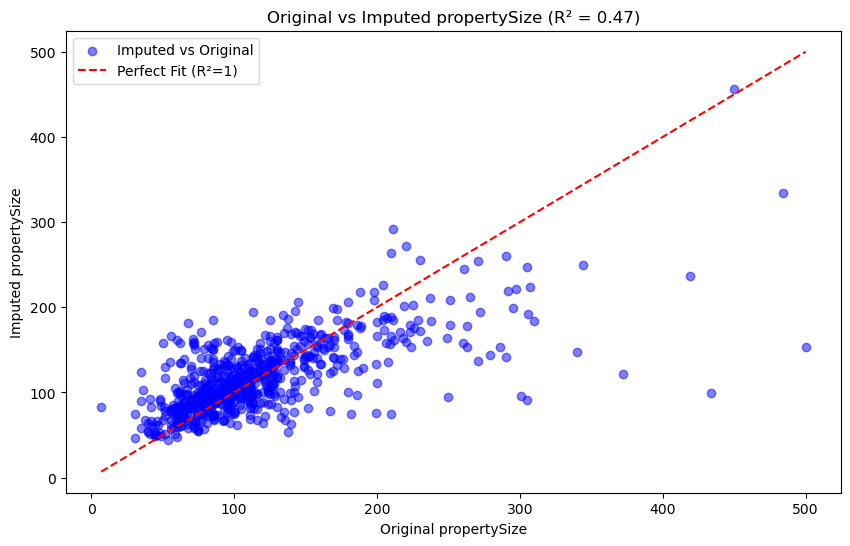

In [51]:
# RMSE - Root Mean Squared Error: Measures the average error magnitude. - the lower the better
rmse = np.sqrt(mean_squared_error(original_values, imputed_values))
print(f"RMSE: {rmse}")

# MAE - Mean Absolute Error: Measures the average of absolute differences between imputed and original values.
# the lower the better
mae = mean_absolute_error(original_values, imputed_values)
print(f"MAE: {mae}")

# R² score
r2 = r2_score(original_values, imputed_values)
print(f"R² score: {r2}")

# 8- Plot the original vs imputed values to visualize the differences
plt.figure(figsize=(10,6))
plt.scatter(original_values, imputed_values, color='blue', alpha=0.5, label='Imputed vs Original')
plt.plot([original_values.min(), original_values.max()], [original_values.min(), original_values.max()], 'r--', label='Perfect Fit (R²=1)')
plt.xlabel('Original propertySize')
plt.ylabel('Imputed propertySize')
plt.title(f'Original vs Imputed propertySize (R² = {r2:.2f})')
plt.legend()
plt.show()

<p style="text-align: center;">By trimming the data, we achieved an\( R^2 \)of 0.47, which is a significant improvement from the previous value of -0.002 without adjustment. This increase demonstrates how removing outliers leads to better results and improves the model's ability to make accurate predictions, as shown in the graph above.</p>


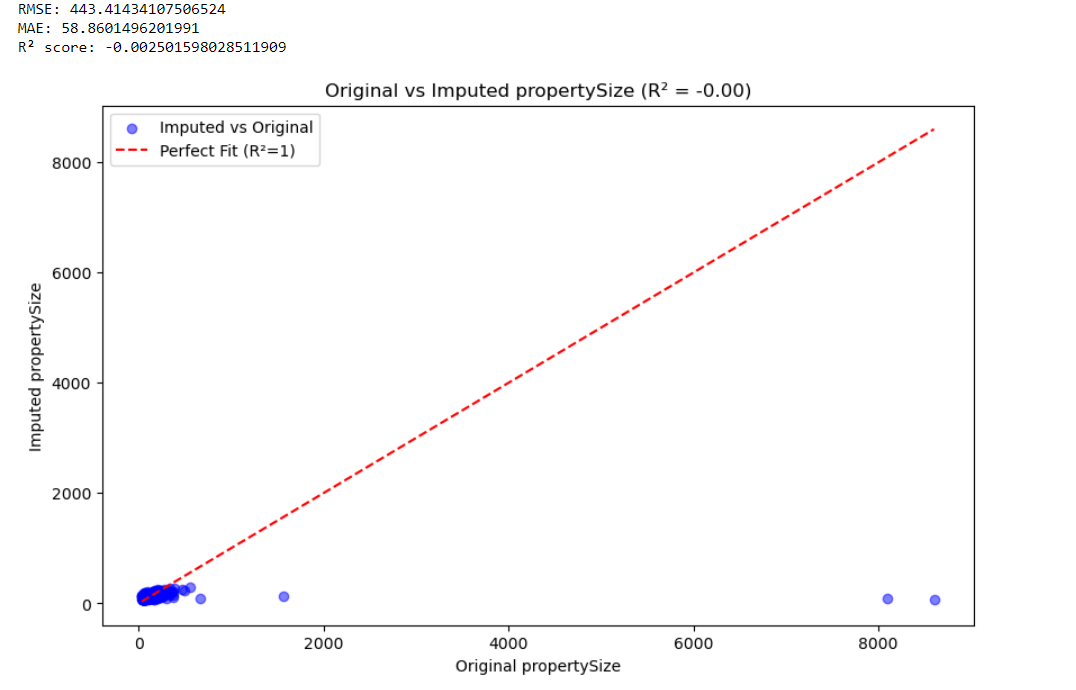

In [52]:
df['propertySize'].isna().sum()

0

---

In [53]:
# Print all rows from the 'propertySize' column
c = 0
for r in df['propertySize']:
    print(f"{c} - {r}")
    c += 1

0 - 96.0
1 - 93.0
2 - 162.0
3 - 68.0
4 - 113.0
5 - 104.0
6 - 169.0
7 - 400.0
8 - 70.0
9 - 58.0
10 - 204.0
11 - 108.0
12 - 95.0
13 - 84.0
14 - 73.0
15 - 70.0
16 - 62.0
17 - 91.0
18 - 62.0
19 - 288.0
20 - 286.0
21 - 114.0
22 - 120.0
23 - 225.0
24 - 70.0
25 - 85.0
26 - 295.0
27 - 95.0
28 - 84.0
29 - 84.0
30 - 73.0
31 - 55.0
32 - 234.0
33 - 84.0
34 - 210.0
35 - 65.0
36 - 78.0
37 - 155.0
38 - 120.0
39 - 82.0
40 - 127.0
41 - 103.0
42 - 63.0
43 - 90.0
44 - 182.0
45 - 84.0
46 - 58.0
47 - 61.0
48 - 157.0
49 - 84.0
50 - 85.0
51 - 113.0
52 - 102.0
53 - 96.0
54 - 205.0
55 - 82.0
56 - 178.0
57 - 125.0
58 - 164.0
59 - 98.0
60 - 166.0
61 - 130.0
62 - 116.0
63 - 98.0
64 - 125.0
65 - 203.0
66 - 250.0
67 - 150.0
68 - 104.0
69 - 198.0
70 - 205.0
71 - 152.0
72 - 160.0
73 - 66.0
74 - 62.0
75 - 65.0
76 - 81.0
77 - 59.0
78 - 60.0
79 - 96.0
80 - 332.0
81 - 109.0
82 - 146.0
83 - 244.0
84 - 98.0
85 - 78.0
86 - 169.0
87 - 152.0
88 - 261.0
89 - 155.0
90 - 130.0
91 - 116.0
92 - 122.0
93 - 232.0
94 - 109.0
95 - 48.

In [54]:
df['propertySize'].isna().sum()

0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3578 entries, 0 to 3951
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        3578 non-null   int64  
 1   numBedrooms                  3578 non-null   int64  
 2   numBathrooms                 3578 non-null   int64  
 3   propertySize                 3578 non-null   float64
 4   total_images                 3578 non-null   float64
 5   video                        3578 non-null   int32  
 6   virtual_tour                 3578 non-null   int32  
 7   brochure                     3578 non-null   int32  
 8   longitude                    3578 non-null   float64
 9   latitude                     3578 non-null   float64
 10  ber_rating                   3578 non-null   int64  
 11  featuredLevel_featured       3578 non-null   float64
 12  featuredLevel_premium        3578 non-null   float64
 13  featuredLevel_standard 

---

---

<h1 align="center"> Reverse ONE HOT ENCODING & EXPORT DF</h1>

<p style="text-align: center;">
    Now, we need to reverse the columns and create a new dataset to work in the vizualisation
    <br>
    To do so we will only use the sated columns that we deleted and add them again to the data set in the same order.
    <br>
    We will save two different datasets, one with the one hot encoded columns to work in the price prediction and the other one for vizualization.
</p>

In [56]:
df_numerical = df
df_visualization = df
print(f"df numerical {df_numerical.shape}")
print(f"df visualization {df_visualization.shape}")
print(f"df split {df_split.shape}")

df numerical (3578, 30)
df visualization (3578, 30)
df split (3578, 4)


In [57]:
df_visualization = df_visualization.drop(['featuredLevel_featured',
'featuredLevel_premium',
'featuredLevel_standard',
'propertyType_Apartment',
'propertyType_Bungalow',
'propertyType_Detached',
'propertyType_Duplex',
'propertyType_End of Terrace',
'propertyType_House',
'propertyType_Semi-D',
'propertyType_Site',
'propertyType_Studio',
'propertyType_Terrace',
'propertyType_Townhouse',
'category_Buy',
'category_New Homes',
'sellerType_BRANDED_AGENT',
'sellerType_PRIVATE_USER',
'sellerType_UNBRANDED_AGENT'], axis=1)

In [58]:
df_viz_ready = pd.concat([df_visualization,df_split], axis=1)

In [59]:
df_viz_ready.isna().sum()

price            0
numBedrooms      0
numBathrooms     0
propertySize     0
total_images     0
video            0
virtual_tour     0
brochure         0
longitude        0
latitude         0
ber_rating       0
featuredLevel    0
propertyType     0
category         0
sellerType       0
dtype: int64

In [60]:
df_numerical.isna().sum()

price                          0
numBedrooms                    0
numBathrooms                   0
propertySize                   0
total_images                   0
video                          0
virtual_tour                   0
brochure                       0
longitude                      0
latitude                       0
ber_rating                     0
featuredLevel_featured         0
featuredLevel_premium          0
featuredLevel_standard         0
propertyType_Apartment         0
propertyType_Bungalow          0
propertyType_Detached          0
propertyType_Duplex            0
propertyType_End of Terrace    0
propertyType_House             0
propertyType_Semi-D            0
propertyType_Site              0
propertyType_Studio            0
propertyType_Terrace           0
propertyType_Townhouse         0
category_Buy                   0
category_New Homes             0
sellerType_BRANDED_AGENT       0
sellerType_PRIVATE_USER        0
sellerType_UNBRANDED_AGENT     0
dtype: int

<p style="text-align: center;">
    Reverse ber_rating column from numerical to objects again for vizualisation. Use map created above when doing the same process.
</p>

In [61]:
# Reverse the mapping (swap keys and values to )
ber_rating_reverse_mapping = {v: k for k, v in ber_rating_mapping.items()}

# Apply the reverse mapping to convert numeric back to the original labels
df_viz_ready['ber_rating'] = df_viz_ready['ber_rating'].map(ber_rating_reverse_mapping)

# Print the first few rows to verify
print(df[['ber_rating']].head())

   ber_rating
0           9
1           8
2           4
4          16
5           8


In [62]:
# those columns have no affect in the visualization
df_viz_ready = df_viz_ready.drop(['video', 'virtual_tour', 'brochure', 'category'], axis = 1)

In [63]:
# reseting index to keep tidy
df_viz_ready = df_viz_ready.reset_index(drop=True)
df_numerical = df_numerical.reset_index(drop=True)

In [64]:
df_viz_ready

,price,numBedrooms,numBathrooms,propertySize,total_images,longitude,latitude,ber_rating,featuredLevel,propertyType,sellerType
0,290000,3,3,96.0,16.0,-8.382500,51.822940,C2,featured,End of Terrace,BRANDED_AGENT
1,225000,3,2,93.0,33.0,-7.177098,53.157465,C1,featured,Semi-D,BRANDED_AGENT
2,575000,4,3,162.0,38.0,-6.342763,53.269493,A3,featured,Semi-D,BRANDED_AGENT
3,120000,3,1,68.0,5.0,-6.879797,53.728601,G,featured,Terrace,BRANDED_AGENT
4,400000,4,3,113.0,20.0,-8.614786,51.883612,C1,featured,Semi-D,BRANDED_AGENT
...,...,...,...,...,...,...,...,...,...,...,...
3573,185000,4,3,125.0,34.0,-8.315556,51.849705,A3,standard,Semi-D,BRANDED_AGENT
3574,235000,3,3,103.0,24.0,-7.212145,53.647194,A1,standard,Semi-D,BRANDED_AGENT
3575,149500,3,1,82.0,14.0,-6.753848,54.115088,A3,standard,Bungalow,UNBRANDED_AGENT
3576,170000,4,2,128.0,38.0,-8.652927,52.664558,A2,standard,Detached,BRANDED_AGENT


In [65]:
df_numerical

,price,numBedrooms,numBathrooms,propertySize,total_images,video,virtual_tour,brochure,longitude,latitude,...,propertyType_Semi-D,propertyType_Site,propertyType_Studio,propertyType_Terrace,propertyType_Townhouse,category_Buy,category_New Homes,sellerType_BRANDED_AGENT,sellerType_PRIVATE_USER,sellerType_UNBRANDED_AGENT
0,290000,3,3,96.0,16.0,0,0,0,-8.382500,51.822940,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,225000,3,2,93.0,33.0,0,0,0,-7.177098,53.157465,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,575000,4,3,162.0,38.0,0,1,0,-6.342763,53.269493,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,120000,3,1,68.0,5.0,0,0,0,-6.879797,53.728601,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,400000,4,3,113.0,20.0,1,0,0,-8.614786,51.883612,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,185000,4,3,125.0,34.0,0,0,0,-8.315556,51.849705,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3574,235000,3,3,103.0,24.0,0,1,0,-7.212145,53.647194,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3575,149500,3,1,82.0,14.0,1,0,0,-6.753848,54.115088,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3576,170000,4,2,128.0,38.0,0,1,0,-8.652927,52.664558,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [66]:
df_viz_ready.to_csv('visualization_daft_ie.csv', index=False)
df_numerical.to_csv('numerical_daft_ie.csv', index=False)